In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib
import plotly.express as px
from datetime import date, time, datetime, timedelta

In [3]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
df1 = pd.read_csv("csvData.csv")
print(df1.head())

        date  confirmed  deaths  recovered
0  2020-1-22          0       0          0
1  2020-1-23          0       0          0
2  2020-1-24          0       0          0
3  2020-1-25          0       0          0
4  2020-1-26          0       0          0


In [5]:
df1['date'] = pd.to_datetime(df1['date'])
df1.set_index('date', inplace=True)
df1.index
print(df1.dtypes)

confirmed    int64
deaths       int64
recovered    int64
dtype: object


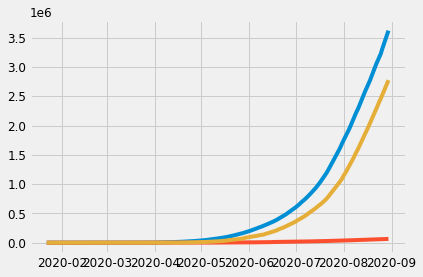

In [6]:
plt.plot(df1)
plt.show()

In [7]:
print ('Mean: ',np.mean(df1['confirmed']))
print ('Standard Deviation: ',np.std(df1['confirmed']))
print ('Maximum Temperature: ',np.max(df1['confirmed']))
print ('Minimum Temperature: ',np.min(df1['confirmed']))

Mean:  569240.7927927928
Standard Deviation:  921112.7982492436
Maximum Temperature:  3621245
Minimum Temperature:  0


In [8]:
df1['active'] = df1['confirmed']- df1['recovered']- df1['deaths']

In [9]:
print(df1.head())
df2 = df1.groupby('date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
print(df2)

            confirmed  deaths  recovered  active
date                                            
2020-01-22          0       0          0       0
2020-01-23          0       0          0       0
2020-01-24          0       0          0       0
2020-01-25          0       0          0       0
2020-01-26          0       0          0       0
          date  recovered  deaths  confirmed  active
0   2020-01-22          0       0          0       0
1   2020-01-23          0       0          0       0
2   2020-01-24          0       0          0       0
3   2020-01-25          0       0          0       0
4   2020-01-26          0       0          0       0
..         ...        ...     ...        ...     ...
217 2020-08-26    2523771   60472    3310234  725991
218 2020-08-27    2583948   61529    3387500  742023
219 2020-08-28    2648998   62550    3463972  752424
220 2020-08-29    2713933   63498    3542733  765302
221 2020-08-30    2774801   64469    3621245  781975

[222 rows x 5 column

In [10]:
recent_date = df1.index.max()
earliest_date = df1.index.min()
print(recent_date)
print(earliest_date)

2020-08-30 00:00:00
2020-01-22 00:00:00


In [11]:
print(df2)
actual_cases = []

          date  recovered  deaths  confirmed  active
0   2020-01-22          0       0          0       0
1   2020-01-23          0       0          0       0
2   2020-01-24          0       0          0       0
3   2020-01-25          0       0          0       0
4   2020-01-26          0       0          0       0
..         ...        ...     ...        ...     ...
217 2020-08-26    2523771   60472    3310234  725991
218 2020-08-27    2583948   61529    3387500  742023
219 2020-08-28    2648998   62550    3463972  752424
220 2020-08-29    2713933   63498    3542733  765302
221 2020-08-30    2774801   64469    3621245  781975

[222 rows x 5 columns]


In [12]:
n = 5
df2 = df2.drop(df2.tail(n).index)

In [13]:
print(df2)

          date  recovered  deaths  confirmed  active
0   2020-01-22          0       0          0       0
1   2020-01-23          0       0          0       0
2   2020-01-24          0       0          0       0
3   2020-01-25          0       0          0       0
4   2020-01-26          0       0          0       0
..         ...        ...     ...        ...     ...
212 2020-08-21    2222577   55794    2975701  697330
213 2020-08-22    2280566   56706    3044940  707668
214 2020-08-23    2338035   57542    3106348  710771
215 2020-08-24    2404585   58390    3167323  704348
216 2020-08-25    2458339   59357    3224547  706851

[217 rows x 5 columns]


In [14]:
confirmed_cases_india = np.array(df2['confirmed']).reshape(-1, 1)

In [15]:
dates = df2.date.unique()
days_index = np.array([i for i in range(len(dates))]).reshape(-1, 1)
last_5_actual_cases = np.round(df2['confirmed'])
print(last_5_actual_cases[-5:])

212    2975701
213    3044940
214    3106348
215    3167323
216    3224547
Name: confirmed, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_index, confirmed_cases_india, test_size=0.42, shuffle=False)

In [17]:
#growth visualization for different algorithms
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('# of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since ' + earliest_date.strftime('%Y-%m-%d') , size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

In [18]:
future_forcast = np.array([i for i in range(len(dates)+ 10)]).reshape(-1, 1)
future_forcast_dates = []
for i in range(len(dates)+10):
    future_forcast_dates.append((earliest_date + timedelta(days=i)).strftime('%Y-%m-%d'))

In [19]:
from sklearn.svm import SVR

svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=4, C=0.2)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_pred = svm_confirmed.predict(future_forcast)

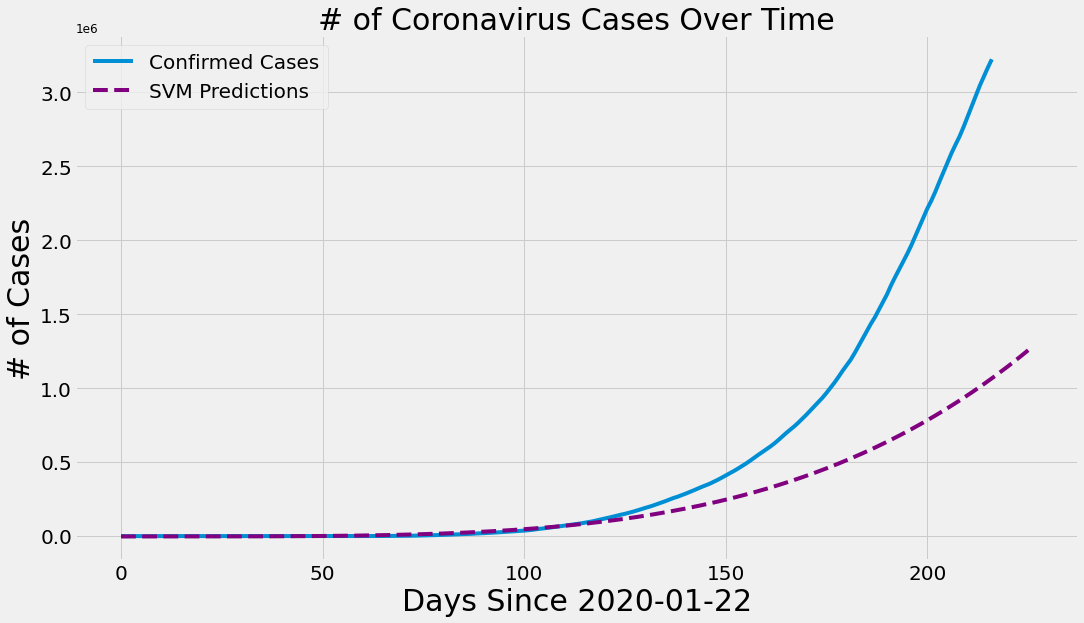

In [20]:
plot_predictions(days_index, confirmed_cases_india, svm_pred, 'SVM Predictions', 'purple')

In [21]:
svm_df = pd.DataFrame({'date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases': np.round(svm_pred[-10:])})
print(svm_df)

         date  SVM Predicted # of Confirmed Cases
0  2020-08-26                           1086733.0
1  2020-08-27                           1106944.0
2  2020-08-28                           1127435.0
3  2020-08-29                           1148208.0
4  2020-08-30                           1169267.0
5  2020-08-31                           1190614.0
6  2020-09-01                           1212251.0
7  2020-09-02                           1234181.0
8  2020-09-03                           1256407.0
9  2020-09-04                           1278931.0


In [22]:
last_5_predictions = np.round(svm_pred[-10:-5])
print(last_5_predictions)

[1086733. 1106944. 1127435. 1148208. 1169267.]


In [23]:
from sklearn.metrics import mean_squared_error
svm_error = mean_squared_error(last_5_actual_cases[-5:], last_5_predictions)
print(svm_error)

3908225304846.8


         date  Linear Regression Predicted # of Confirmed Cases Worldwide
0  2020-08-26                                           530511.0         
1  2020-08-27                                           536656.0         
2  2020-08-28                                           542837.0         
3  2020-08-29                                           549051.0         
4  2020-08-30                                           555301.0         
5  2020-08-31                                           561585.0         
6  2020-09-01                                           567904.0         
7  2020-09-02                                           574258.0         
8  2020-09-03                                           580646.0         
9  2020-09-04                                           587070.0         


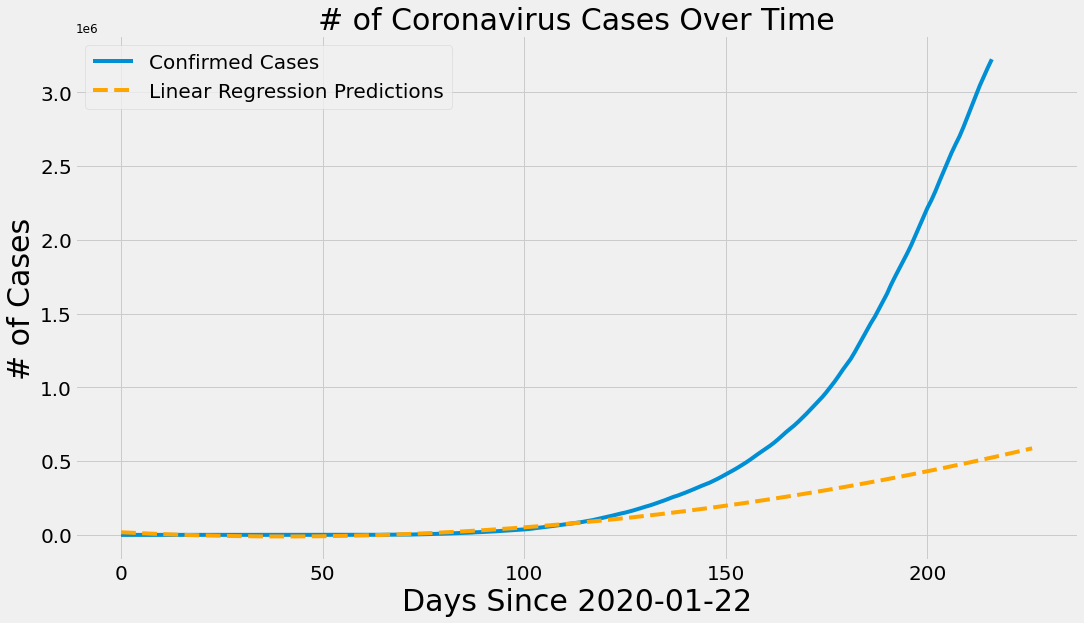

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed.ravel())
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)

lr_df = pd.DataFrame({'date': future_forcast_dates[-10:], 'Linear Regression Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
print(lr_df)

plot_predictions(days_index, confirmed_cases_india, linear_pred, 'Linear Regression Predictions', 'orange')

In [32]:
last_5_predictions = np.round(linear_pred[-10:-5])
lr_error = mean_squared_error(last_5_actual_cases[-5:], last_5_predictions)
print(lr_error)

6564450776475.4


         date  MLP Predicted # of Confirmed Cases
0  2020-08-26                            671736.0
1  2020-08-27                            677432.0
2  2020-08-28                            683128.0
3  2020-08-29                            688825.0
4  2020-08-30                            694521.0
5  2020-08-31                            700217.0
6  2020-09-01                            705913.0
7  2020-09-02                            711610.0
8  2020-09-03                            717306.0
9  2020-09-04                            723002.0


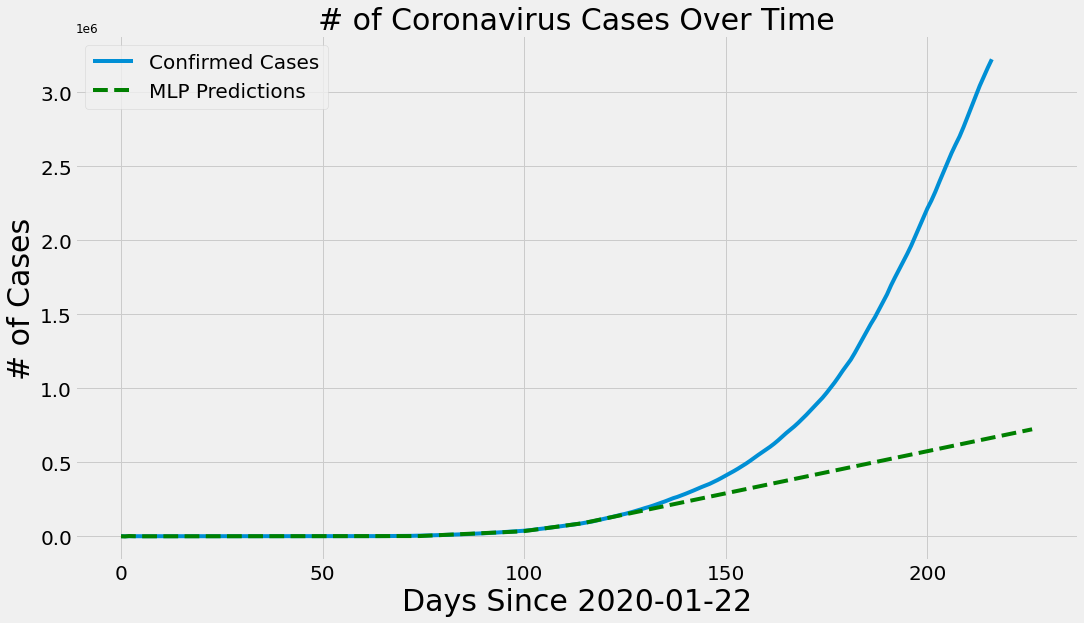

In [29]:
from sklearn.neural_network import MLPRegressor

mlp_confirmed = MLPRegressor(solver='lbfgs', max_iter=500)
mlp_confirmed.fit(X_train_confirmed, y_train_confirmed.ravel())
mlp_pred = mlp_confirmed.predict(future_forcast)

mlp_df = pd.DataFrame({'date': future_forcast_dates[-10:], 'MLP Predicted # of Confirmed Cases': np.round(mlp_pred[-10:])})
print(mlp_df)

plot_predictions(days_index, confirmed_cases_india, mlp_pred, 'MLP Predictions', 'green')

In [31]:
last_5_predictions = np.round(mlp_pred[-10:-5])
mlp_error = mean_squared_error(last_5_actual_cases[-5:], last_5_predictions)
print(mlp_error)

5865865583273.8
